In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
# Generate dataset
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
# Save dataset
np.savetxt("circular_dataset.csv", np.hstack((X, y.reshape(-1, 1))),
delimiter=",", header="x1,x2,label", comments="")

In [18]:
df = pd.read_csv("./circular_dataset.csv")

In [19]:
df.head()

,x1,x2,label
0,-0.241830,0.425163,1.0
1,0.209763,-0.489948,1.0
2,0.427926,0.040112,1.0
3,0.881626,0.416984,0.0
4,-0.470089,-0.171297,1.0


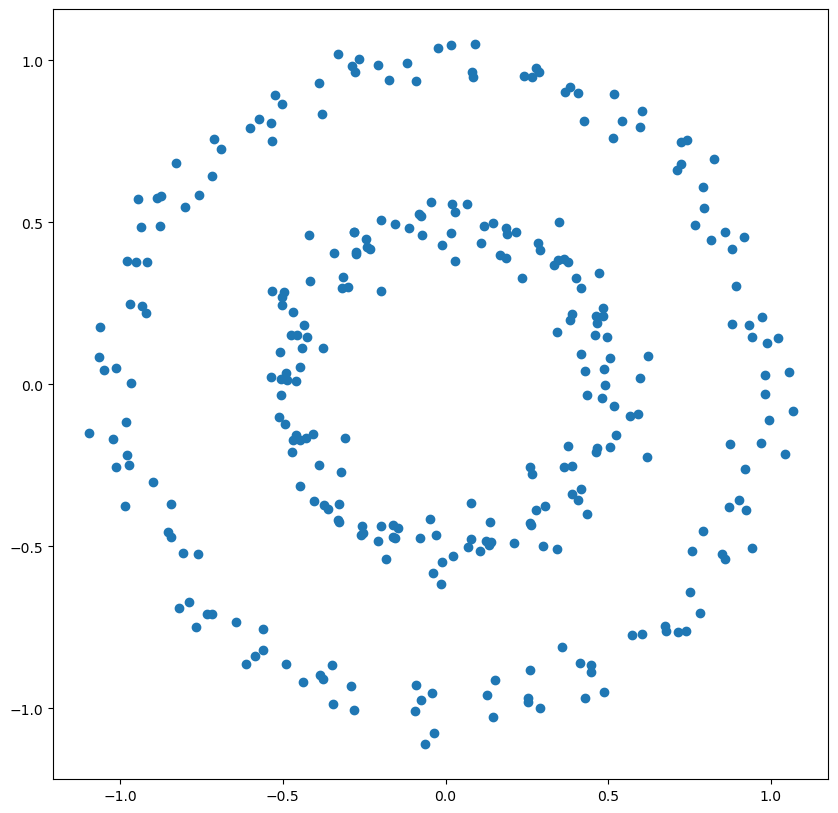

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 10))
plt.scatter(df["x1"], df["x2"])

In [21]:
# feature transformations:
df["x1_squared"] = df["x1"]**2
df["x2_squared"] = df["x2"]**2
df["x1x2"] = df["x1"]*df["x2"]

In [22]:
df.head()

,x1,x2,label,x1_squared,x2_squared,x1x2
0,-0.241830,0.425163,1.0,0.058482,0.180764,-0.102817
1,0.209763,-0.489948,1.0,0.044000,0.240049,-0.102773
2,0.427926,0.040112,1.0,0.183121,0.001609,0.017165
3,0.881626,0.416984,0.0,0.777264,0.173875,0.367623
4,-0.470089,-0.171297,1.0,0.220984,0.029343,0.080525


In [9]:
import pandas as pd
if isinstance(X, pd.DataFrame):
    print("Is dataframe")
else:
    print("Is not a dataframe")

Is not a dataframe


In [32]:
np.unique(y)
input_data = df[["x1_squared", "x2_squared", "x1x2"]]
data_lables = df["label"]


In [33]:
from sklearn import svm
clf = svm.SVC()
clf.fit(input_data, data_lables)

SVC()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Create a mesh grid in the original x1-x2 space
x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

# Transform mesh grid points to the feature space used for training
X_grid_transformed = np.c_[xx1.ravel()**2, xx2.ravel()**2, xx1.ravel() * xx2.ravel()]
X_grid_transformed = scaler.transform(X_grid_transformed)

# Predict using trained SVM model
Z = clf.predict(X_grid_transformed).reshape(xx1.shape)

# Plot decision boundary and original dataset
plt.figure(figsize=(6,6))
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # Decision boundary
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolors='k')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary on Original Dataset")
plt.legend()
plt.show()

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

0      True
1      True
2      True
3      True
4      True
       ... 
295    True
296    True
297    True
298    True
299    True
Name: label, Length: 300, dtype: bool

**Below is CHATGPT generated solution for the problem**

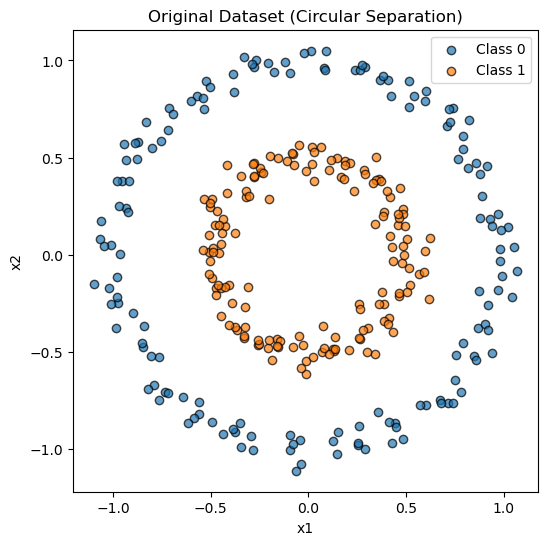

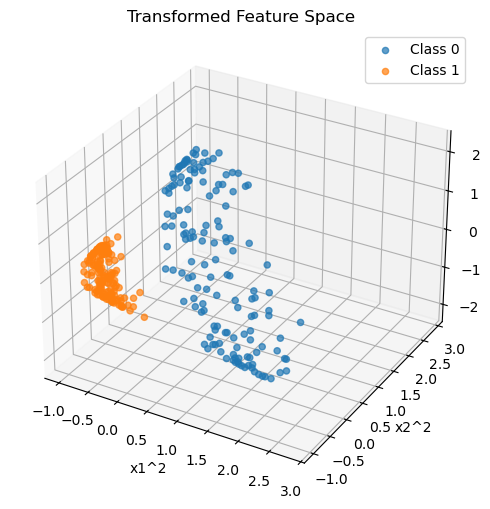

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load dataset
data = np.loadtxt("circular_dataset.csv", delimiter=",", skiprows=1)
X, y = data[:, :2], data[:, 2]

# Plot original dataset
plt.figure(figsize=(6,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.7, edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.7, edgecolors='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Original Dataset (Circular Separation)")
plt.legend()
plt.show()

# Feature transformation
X_transformed = np.column_stack((X[:, 0]**2, X[:, 1]**2, X[:, 0] * X[:, 1]))

# Standardize transformed features
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X_transformed)

# Plot transformed space
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_transformed[y == 0][:, 0], X_transformed[y == 0][:, 1], X_transformed[y == 0][:, 2], label="Class 0", alpha=0.7)
ax.scatter(X_transformed[y == 1][:, 0], X_transformed[y == 1][:, 1], X_transformed[y == 1][:, 2], label="Class 1", alpha=0.7)
ax.set_xlabel("x1^2")
ax.set_ylabel("x2^2")
ax.set_zlabel("x1 * x2")
ax.set_title("Transformed Feature Space")
ax.legend()
plt.show()

In [52]:
# Train linear SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_transformed, y)

SVC(kernel='linear')

In [54]:

# Get model coefficients
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

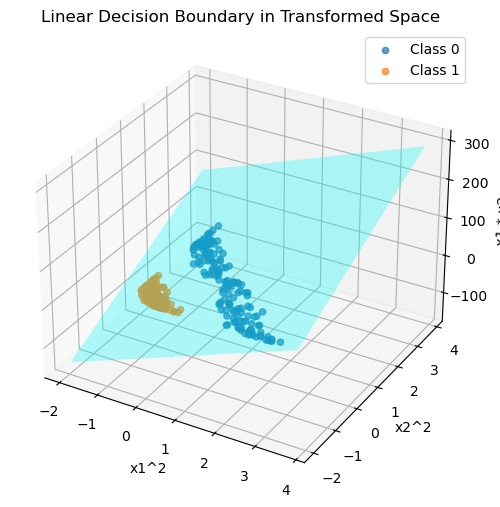

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid for decision boundary in transformed space
x_min, x_max = X_transformed[:, 0].min() - 1, X_transformed[:, 0].max() + 1
y_min, y_max = X_transformed[:, 1].min() - 1, X_transformed[:, 1].max() + 1
z_min, z_max = X_transformed[:, 2].min() - 1, X_transformed[:, 2].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
zz = (-w[0] * xx - w[1] * yy - b) / w[2]  # Solving for x1*x2

# Plot transformed space with decision boundary
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

# Scatter plot of transformed features
ax.scatter(X_transformed[y == 0][:, 0], X_transformed[y == 0][:, 1], X_transformed[y == 0][:, 2], label="Class 0", alpha=0.7)
ax.scatter(X_transformed[y == 1][:, 0], X_transformed[y == 1][:, 1], X_transformed[y == 1][:, 2], label="Class 1", alpha=0.7)

# Plot decision boundary
ax.plot_surface(xx, yy, zz, color='cyan', alpha=0.3)

ax.set_xlabel("x1^2")
ax.set_ylabel("x2^2")
ax.set_zlabel("x1 * x2")
ax.set_title("Linear Decision Boundary in Transformed Space")
ax.legend()
plt.show()